<a href="https://colab.research.google.com/github/PrachitiSParulekar/ml-linear-models/blob/main/svm_rbf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# 1. Generate synthetic non-linear data (concentric circles)
X_rbf, y_rbf = make_circles(
    n_samples=200, noise=0.1, factor=0.3, random_state=42
)

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_rbf, y_rbf, test_size=0.3, random_state=42
)


In [46]:
# 3. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)
y_pred = svm_rbf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"RBF SVM Accuracy: {accuracy:.4f}")
print(f"Support Vectors: {svm_rbf.n_support_}")

RBF SVM Accuracy: 1.0000
Support Vectors: [13 10]


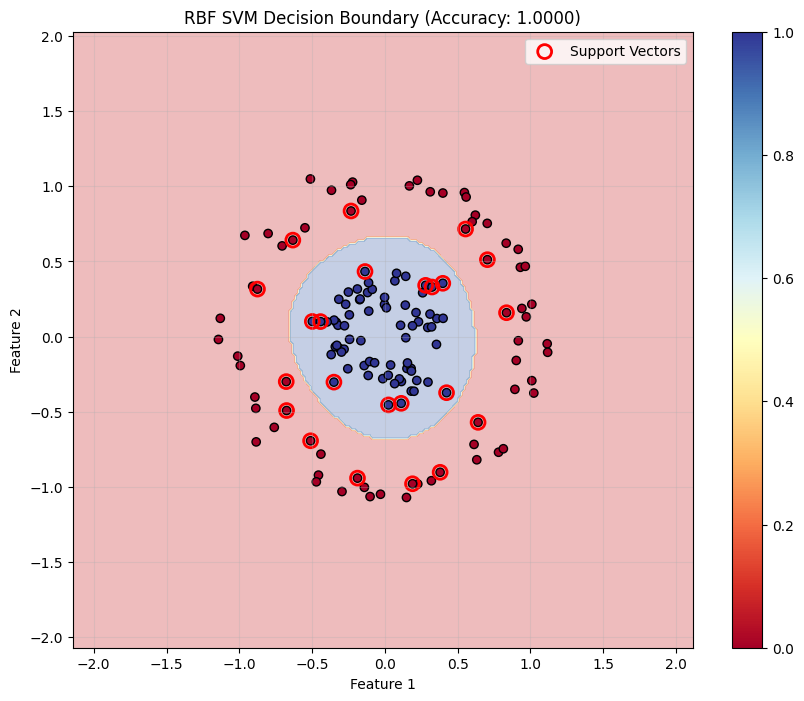

In [47]:
# 5. Plot decision boundary
plt.figure(figsize=(10, 8))
X_plot = scaler.inverse_transform(X_train_scaled)

h = 0.02
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_points_scaled = scaler.transform(mesh_points)

Z = svm_rbf.predict(mesh_points_scaled)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)

# Plot training points
scatter = plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_train, cmap=plt.cm.RdYlBu, edgecolors='black')

# Highlight support vectors
support_vectors = scaler.inverse_transform(svm_rbf.support_vectors_)
plt.scatter(
    support_vectors[:, 0], support_vectors[:, 1],
    s=100, facecolors='none', edgecolors='red', linewidth=2, label='Support Vectors'
)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'RBF SVM Decision Boundary (Accuracy: {accuracy:.4f})')
plt.legend()
plt.colorbar(scatter)
plt.grid(True, alpha=0.3)
plt.show()